In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
stock = pd.read_csv("data/stock_prices.csv")
stock.head()

,date,ticker,close_price
0,2023-01-01,AAPL,210.82
1,2023-01-02,AAPL,214.18
2,2023-01-03,AAPL,216.24
3,2023-01-04,AAPL,217.10
4,2023-01-05,AAPL,218.96


In [6]:
stock.set_index("date", inplace=True)

In [7]:
stock.describe(include='all')

,ticker,close_price
count,5000,5000.000000
unique,5,NaN
top,AAPL,NaN
freq,1000,NaN
mean,NaN,167.614466
std,NaN,47.012464
min,NaN,83.780000
25%,NaN,126.877500
50%,NaN,159.975000
75%,NaN,210.585000


In [8]:
# Filter AAPL stock only
AAPL = stock[stock['ticker'] == 'AAPL']
AAPL.head()

,ticker,close_price
date,,
2023-01-01,AAPL,210.82
2023-01-02,AAPL,214.18
2023-01-03,AAPL,216.24
2023-01-04,AAPL,217.10
2023-01-05,AAPL,218.96


In [12]:
# Compute rolling metrics
AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
AAPL['30d_rolling_avg'] = AAPL['close_price'].rolling(window=30, min_periods=1).mean().fillna(method='bfill')
AAPL.head(10)

/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or o

,ticker,close_price,7d_rolling_avg,30d_rolling_avg
date,,,,
2023-01-01,AAPL,210.82,210.820000,210.820000
2023-01-02,AAPL,214.18,212.500000,212.500000
2023-01-03,AAPL,216.24,213.746667,213.746667
2023-01-04,AAPL,217.10,214.585000,214.585000
2023-01-05,AAPL,218.96,215.460000,215.460000
2023-01-06,AAPL,216.87,215.695000,215.695000
2023-01-07,AAPL,213.12,215.327143,215.327143
2023-01-08,AAPL,210.00,215.210000,214.661250
2023-01-09,AAPL,210.58,214.695714,214.207778


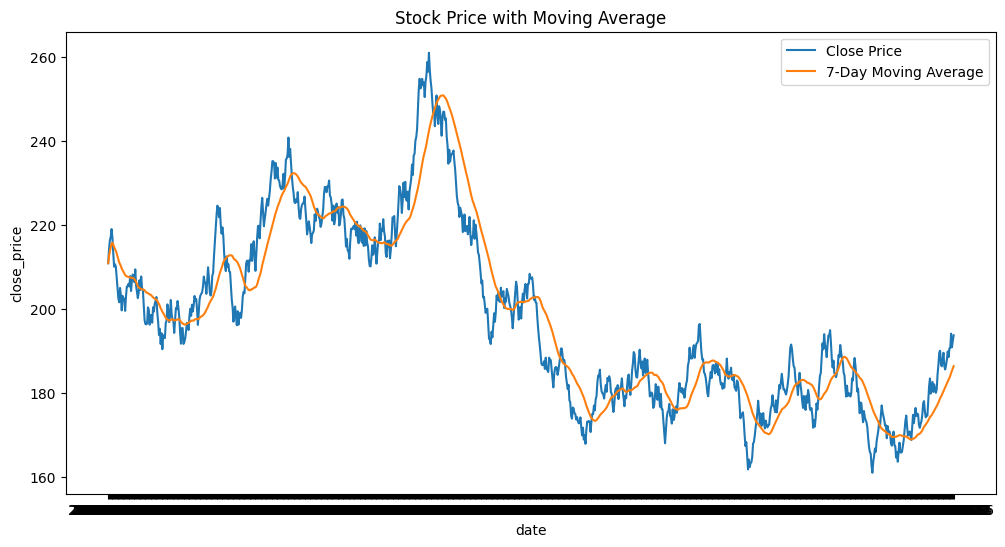

In [14]:
# Plot the rolling averages alongside the daily closing price using matplotlib or seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=AAPL, x=AAPL.index, y='close_price', label='Close Price')
sns.lineplot(data=AAPL, x=AAPL.index, y='30d_rolling_avg', label='7-Day Moving Average')
plt.title('Stock Price with Moving Average')
plt.legend()
plt.show() 

In [15]:
# Calculate percent change
AAPL['percent_change'] = (AAPL['close_price'] - AAPL['close_price'].shift(1)) / AAPL['close_price'].shift(1)
AAPL.head(10)

/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/3102978367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['percent_change'] = (AAPL['close_price'] - AAPL['close_price'].shift(1)) / AAPL['close_price'].shift(1)


,ticker,close_price,7d_rolling_avg,30d_rolling_avg,percent_change
date,,,,,
2023-01-01,AAPL,210.82,210.820000,210.820000,NaN
2023-01-02,AAPL,214.18,212.500000,212.500000,0.015938
2023-01-03,AAPL,216.24,213.746667,213.746667,0.009618
2023-01-04,AAPL,217.10,214.585000,214.585000,0.003977
2023-01-05,AAPL,218.96,215.460000,215.460000,0.008567
2023-01-06,AAPL,216.87,215.695000,215.695000,-0.009545
2023-01-07,AAPL,213.12,215.327143,215.327143,-0.017291
2023-01-08,AAPL,210.00,215.210000,214.661250,-0.014640
2023-01-09,AAPL,210.58,214.695714,214.207778,0.002762


In [16]:
# Time Series Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
features = ['7d_rolling_avg', '30d_rolling_avg']
X = AAPL[features]
y = AAPL['close_price']

# More robust time-based split using TimeSeriesSplit, maintaining temporal order
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [18]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

Root Mean Squared Error: $3.53
Mean Absolute Error: $2.87
R-squared Score: 0.8275


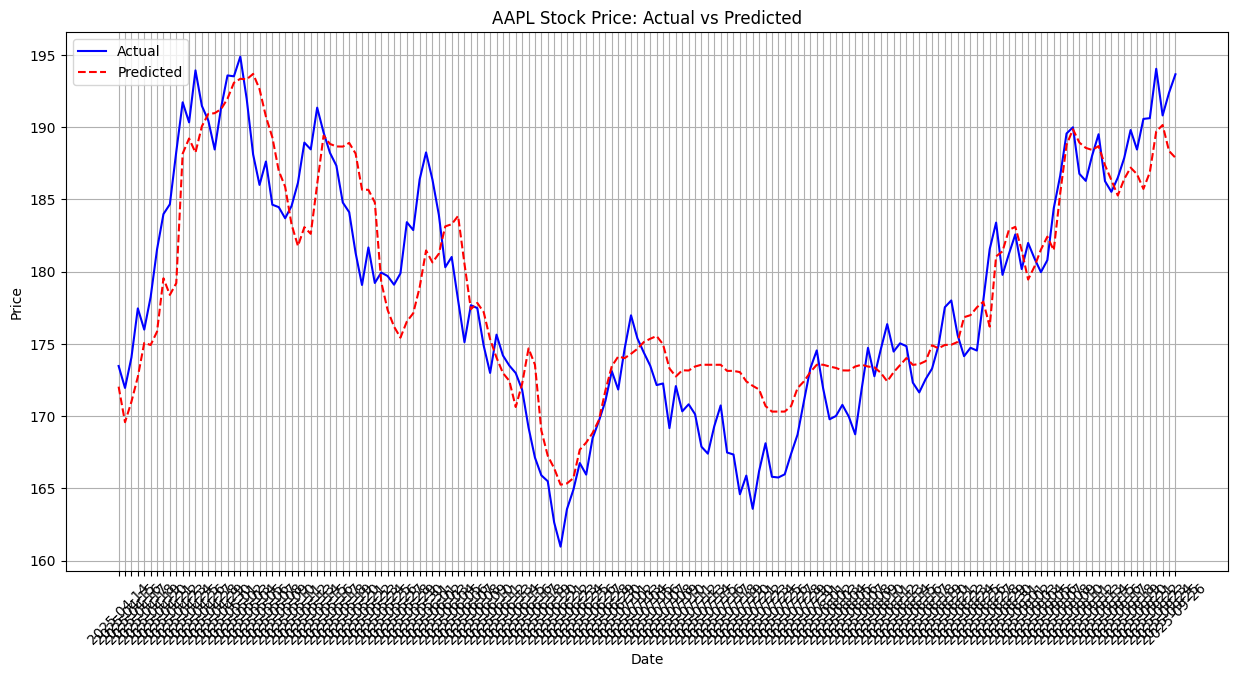

In [19]:
# Create prediction plot
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('AAPL Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

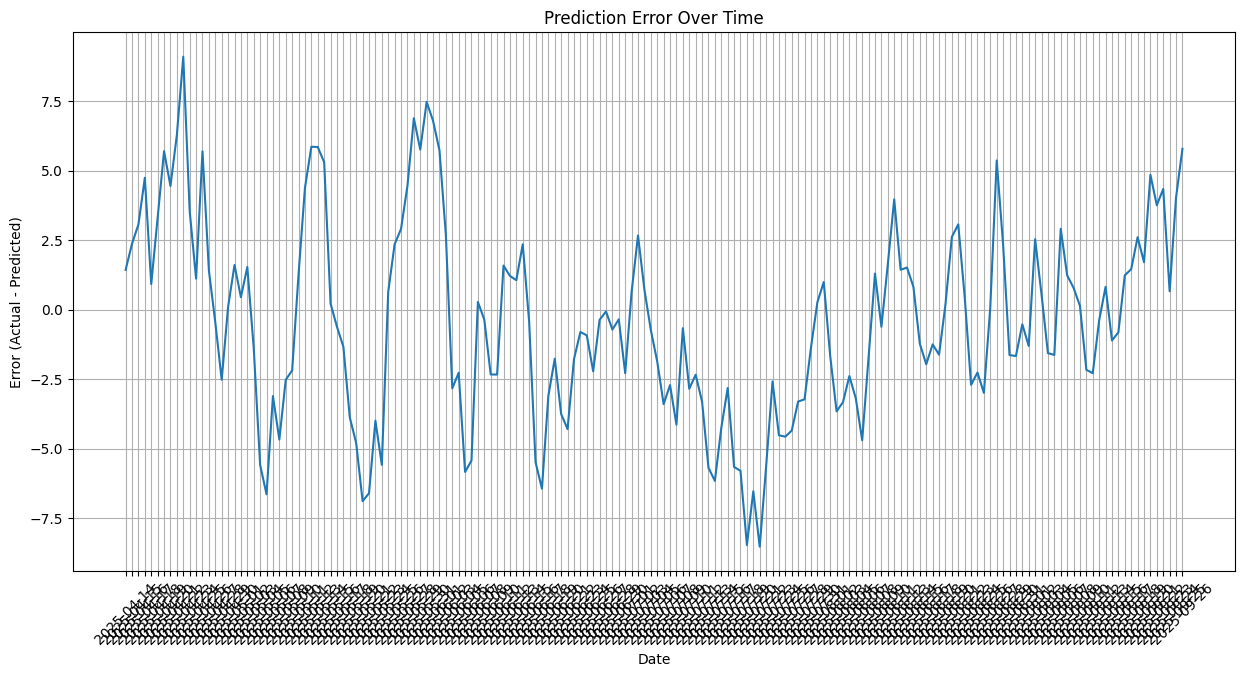

In [20]:
# Plot prediction error
plt.figure(figsize=(15, 7))
errors = y_test - y_pred
plt.plot(y_test.index, errors)
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

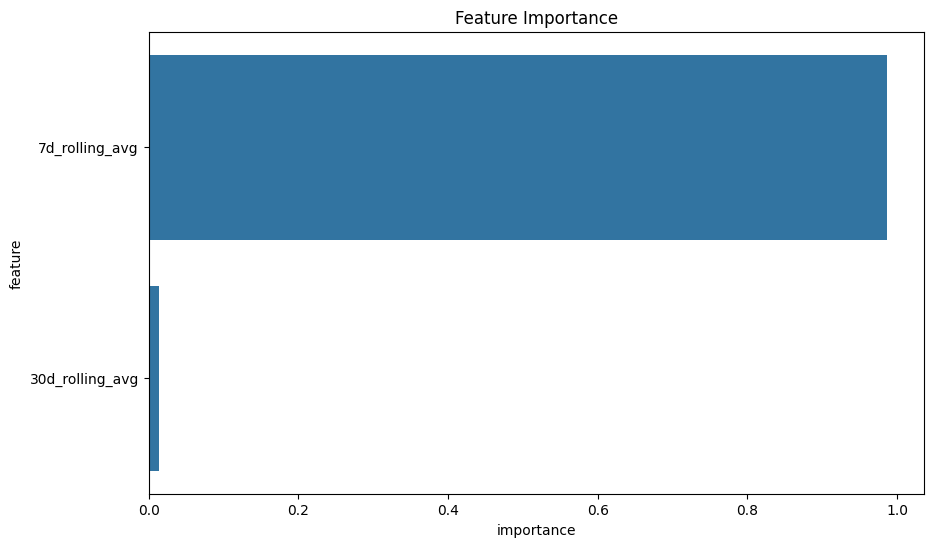

In [21]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/4050012005.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_data = pd.concat([future_data, new_row])
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/4050012005.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_data = pd.concat([future_data, new_row])
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/4050012005.py:33: FutureWarning: The behavior of DataFrame concatenation with emp

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x129e77d10>.

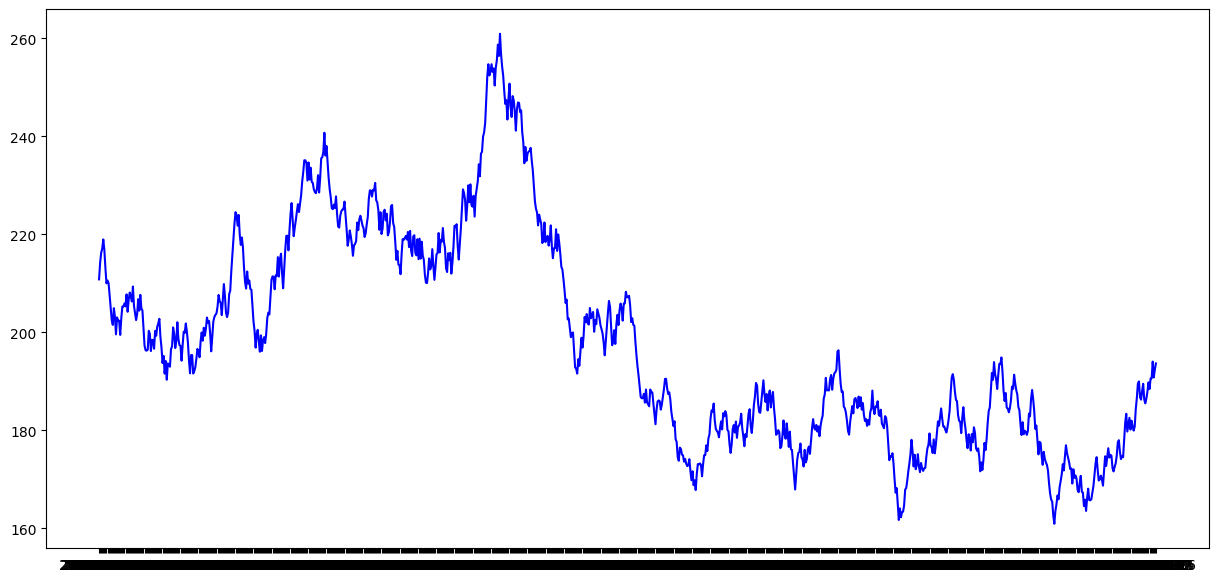

In [24]:
# For future dates predictions
# Recursive Prediction
def predict_future(model, last_known_data, days_to_predict=365):
    # Ensure index is datetime
    future_data = last_known_data.copy()
    future_data.index = pd.to_datetime(future_data.index)
    
    predictions = []
    dates = []
    
    last_date = future_data.index[-1]
    
    for i in range(days_to_predict):
        # Update features
        future_data['lag_1'] = future_data['close_price'].shift(1)
        future_data['7d_rolling_avg'] = future_data['close_price'].rolling(window=7).mean()
        future_data['30d_rolling_avg'] = future_data['close_price'].rolling(window=30).mean()
        future_data['7d_rolling_std'] = future_data['close_price'].rolling(window=7).std()
        
        # Make prediction
        next_pred = model.predict(future_data[features].iloc[-1:])
        predictions.append(next_pred[0])
        
        # Create next date (skip weekends)
        next_date = last_date + pd.Timedelta(days=1)
        while next_date.weekday() > 4:  # Skip Saturday (5) and Sunday (6)
            next_date += pd.Timedelta(days=1)
        dates.append(next_date)
        
        # Add prediction to dataset
        new_row = pd.DataFrame(index=[next_date], columns=future_data.columns)
        new_row['close_price'] = next_pred[0]
        future_data = pd.concat([future_data, new_row])
        
        last_date = next_date
    
    return pd.Series(predictions, index=dates)

# Use the function
last_known = AAPL.tail(30)  # Use last 30 days as starting point
future_predictions = predict_future(rf_model, last_known)

# Plot results
plt.figure(figsize=(15, 7))
plt.plot(AAPL.index, AAPL['close_price'], label='Historical', color='blue')
plt.plot(future_predictions.index, future_predictions.values, 
         label='Predictions', color='red', linestyle='--')
plt.title('AAPL Stock Price: Historical and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# ARIMA Model
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Check for stationarity (required for ARIMA)
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Check original series
check_stationarity(AAPL['close_price'])

# If not stationary, take first difference
AAPL['price_diff'] = AAPL['close_price'].diff()
check_stationarity(AAPL['price_diff'].dropna())

ADF Statistic: -1.7372168363101972
p-value: 0.41204638988796627
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
ADF Statistic: -21.617983999614797
p-value: 0.0
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1449011937.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['price_diff'] = AAPL['close_price'].diff()


In [26]:
# 2. Train ARIMA model
# Split data
train_size = int(len(AAPL) * 0.8)
train_data = AAPL['close_price'][:train_size]
test_data = AAPL['close_price'][train_size:]

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5,1,2))  # (p,d,q) parameters
arima_results = arima_model.fit()

# Make predictions
arima_predictions = arima_results.forecast(steps=len(test_data))

/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [27]:
# 3. Compare with Random Forest (using previous implementation)
rf_predictions = rf_model.predict(X_test)

# 4. Calculate metrics for both models
def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Metrics:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"R2 Score: {r2:.4f}")
    return rmse, mae, r2

# Calculate metrics for both models
arima_metrics = calculate_metrics(test_data, arima_predictions, "ARIMA")
rf_metrics = calculate_metrics(y_test, rf_predictions, "Random Forest")


ARIMA Metrics:
RMSE: $8.30
MAE: $7.00
R2 Score: -0.0601

Random Forest Metrics:
RMSE: $3.53
MAE: $2.87
R2 Score: 0.8275
